In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import random
import datetime
import warnings
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report,roc_curve


warnings.filterwarnings('ignore')

# Imports for better visualization
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'


In [2]:
#%%time
train_csv = "final_sales_data_trimme_new1.csv"
train = pd.read_csv(train_csv,encoding = "ISO-8859-1")
train_backup=train.copy()


In [3]:
train.shape

(588, 88)

In [4]:
train.columns

Index(['Region', 'Subregion', 'Oppurtunityname', 'Endcustomer',
       'Endcustomercountry', 'Endcustomerindustry', 'Partner', 'Offering_type',
       'Primary_Play', 'Opportunity_Source', 'Competition',
       'Who_did_Genesys_Replace', 'Key_Business_Objective',
       'Factors_Influencing_Price', 'Reason_For_Win', 'Smart_Use_Cases',
       'CE01', 'CE08', 'EE08', 'EE30', 'EE07', 'EE01', 'CE16', 'CE07', 'CE03',
       'CE18', 'CE22', 'CE09', 'CE11', 'CE15', 'CE10', 'CE02', 'CE25', 'CE27',
       'EE02', 'SL01', 'EE09', 'CE24', 'CE20', 'CE19', 'CE12', 'EE03', 'CE21',
       'CE23', 'BO02', 'CE13', 'CE17', 'BO06', 'CE05', 'CE14', 'BO01', 'BO03',
       'EE04', 'CE31', 'CE28', 'CE29', 'BO07', 'SL06', 'CE40', 'CE30', 'BO04',
       'EE32', 'OP01', 'OP04', 'EE22', 'EE21', 'EE26', 'EE23', 'SL09', 'EE29',
       'CE38', 'CE32', 'CE06', 'MK01', 'EE24', 'OP02', 'EE12', 'CE04', 'CE26',
       'CE39', 'EE15', 'CE41', 'CE34', 'EE17', 'EE16', 'EE14', 'EE13', 'BO05'],
      dtype='object')

In [5]:
train.drop(['Region','Subregion','Oppurtunityname','Endcustomer','Opportunity_Source'],axis = 1,inplace = True)
train.drop(['Factors_Influencing_Price','Key_Business_Objective','Reason_For_Win','Primary_Play','Competition'],axis = 1,inplace = True)

In [6]:
train.shape

(588, 78)

In [7]:
train

,Endcustomercountry,Endcustomerindustry,Partner,Offering_type,Who_did_Genesys_Replace,Smart_Use_Cases,CE01,CE08,EE08,EE30,EE07,EE01,CE16,CE07,CE03,CE18,CE22,CE09,CE11,CE15,CE10,CE02,CE25,CE27,EE02,SL01,EE09,CE24,CE20,CE19,CE12,EE03,CE21,CE23,BO02,CE13,CE17,BO06,CE05,CE14,BO01,BO03,EE04,CE31,CE28,CE29,BO07,SL06,CE40,CE30,BO04,EE32,OP01,OP04,EE22,EE21,EE26,EE23,SL09,EE29,CE38,CE32,CE06,MK01,EE24,OP02,EE12,CE04,CE26,CE39,EE15,CE41,CE34,EE17,EE16,EE14,EE13,BO05
0,Canada,GOVERNMENT,LGS an IBM company,PureEngage,Genesys Customer (add-on),CE01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Canada,OTHER,Cirrus 9 Inc.,PureEngage,None - Green Field,CE08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Russia,RETAIL,CROC,PureEngage,Other Local Vendor,EE08-EE07-CE01,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,United States,TRANSPORTATION & STORAGE,,PureCloud,Avaya (Nortel),EE01-EE07-CE16-CE07-CE03-CE01,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Canada,SOFTWARE & INTERNET,,PureCloud,Avaya (Nortel),CE01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Canada,FINANCIAL SERVICES,Aria Solutions,PureEngage,NaN,CE03,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Colombia,GOVERNMENT,IG UNIFIED COMMUNICATIONS S.A.S (aka Intergrupo),PureCloud,Other Local Vendor,CE01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,United States,RETAIL,Avtex,PureCloud,Avaya (Nortel),CE01- CE03- CE18- CE16- EE07,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,United States,FINANCIAL SERVICES,,PureEngage,Avaya (Nortel),CE22-CE03-CE01,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,United States,FINANCIAL SERVICES,,PureConnect,Genesys Customer (add-on),CE08-CE07,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
train.columns

Index(['Endcustomercountry', 'Endcustomerindustry', 'Partner', 'Offering_type',
       'Who_did_Genesys_Replace', 'Smart_Use_Cases', 'CE01', 'CE08', 'EE08',
       'EE30', 'EE07', 'EE01', 'CE16', 'CE07', 'CE03', 'CE18', 'CE22', 'CE09',
       'CE11', 'CE15', 'CE10', 'CE02', 'CE25', 'CE27', 'EE02', 'SL01', 'EE09',
       'CE24', 'CE20', 'CE19', 'CE12', 'EE03', 'CE21', 'CE23', 'BO02', 'CE13',
       'CE17', 'BO06', 'CE05', 'CE14', 'BO01', 'BO03', 'EE04', 'CE31', 'CE28',
       'CE29', 'BO07', 'SL06', 'CE40', 'CE30', 'BO04', 'EE32', 'OP01', 'OP04',
       'EE22', 'EE21', 'EE26', 'EE23', 'SL09', 'EE29', 'CE38', 'CE32', 'CE06',
       'MK01', 'EE24', 'OP02', 'EE12', 'CE04', 'CE26', 'CE39', 'EE15', 'CE41',
       'CE34', 'EE17', 'EE16', 'EE14', 'EE13', 'BO05'],
      dtype='object')

# XGB Model for Smart use case detection

In [9]:
smartusecase=train.copy()

In [10]:
import numpy
newsmartusecase = pd.DataFrame(columns=list(smartusecase.columns.values))
i=0
j=0
for row in smartusecase.iterrows():
    smartusecaselist=row[1]['Smart_Use_Cases'].split('-')
    #newsmartusecase.loc[i]=row[1]
    if(len(smartusecaselist) == 1):
        newsmartusecase.loc[i]=row[1]
    else:
        for case in smartusecaselist:
            print(case)
            temp=row[1].copy()
            temp['Smart_Use_Cases']=case.strip()
            newsmartusecase.loc[i]=temp
            i=i+1
    i=i+1
    j=j+1
    print("processing row",j)

processing row 1
processing row 2
 EE08
EE07
CE01
processing row 3
 EE01
EE07
CE16
CE07
CE03
CE01
processing row 4
processing row 5
processing row 6
processing row 7
 CE01
 CE03
 CE18
 CE16
 EE07
processing row 8
 CE22
CE03
CE01
processing row 9
 CE08
CE07
processing row 10
 CE07
 CE09
processing row 11
 CE11
CE15
CE01
processing row 12
 CE07
CE10
processing row 13
 EE07
CE02
CE01
processing row 14
 CE15
CE03
CE01
processing row 15
processing row 16
 CE11
CE01
processing row 17
 CE09
CE10
processing row 18
 CE01
 CE07
 CE25
 CE27
 EE01
 EE02
processing row 19
 EE09
EE07
CE18
CE16
CE01
processing row 20
 CE27
CE24
CE20
CE19
CE18
processing row 21
 CE01
 CE02
 CE12
 EE01
 EE03
 EE07
 EE09
processing row 22
 EE09
EE07
EE03
EE01
CE18
CE16
CE03
CE01
processing row 23
 EE02
EE01
processing row 24
processing row 25
 EE09
EE07
CE11
CE01
processing row 26
 CE01
CE15
CE11
processing row 27
 CE07
CE11
CE01
processing row 28
 CE01
 CE21
processing row 29
 CE11
EE09
EE07
CE12
CE22
CE18
CE16
CE01
pr

processing row 219
 EE01
EE09
EE07
CE11
CE07
CE01
processing row 220
processing row 221
 EE09
CE11
processing row 222
 EE07
CE03
CE01
processing row 223
 EE07
CE18
CE03
CE01
processing row 224
 EE09
CE01
CE16
processing row 225
 CE18
CE16
EE07
CE11
CE03
CE01
processing row 226
 CE01
 CE07
 CE18
 CE27
processing row 227
 EE07
CE07
CE01
processing row 228
 EE09
EE07
EE02
EE01
CE18
CE16
CE03
CE01
processing row 229
 CE20
CE09
CE11
CE07
CE22
CE21
CE19
CE02
CE18
CE16
CE03
CE01
processing row 230
 EE07
CE07
CE01
CE11
processing row 231
 EE07
CE18
CE11
CE09
CE01
processing row 232
 EE07
CE27
CE18
CE16
CE11
CE09
CE03
CE01
processing row 233
 CE18
CE16
CE09
CE03
CE01
processing row 234
 EE07
CE08
CE03
CE01
processing row 235
 OP04
OP01
EE09
EE07
EE02
EE01
CE27
CE18
CE16
CE07
CE03
CE01
processing row 236
 EE07
CE03
CE01
processing row 237
 CE11
EE09
BO07
CE07
CE16
EE07
CE03
CE18
OP01
CE01
processing row 238
 CE22
CE18
CE01
processing row 239
 CE27
CE18
CE01
processing row 240
 EE09
EE07
CE11
CE1

 CE02
 EE01
 EE08
processing row 411
processing row 412
CE01
 CE02
processing row 413
CE09
 EE08
 BO07
processing row 414
CE18
 CE19
  CE27
 CE28
 CE29
 CE20
 BO02
 EE01
 EE02
processing row 415
CE15
 CE28
 CE27
 CE13
 CE01
 CE16
 CE18
 EE08
 CE19
 CE25
 CE09
processing row 416
EE07
 EE09
processing row 417
CE09
 CE20
 CE28
 CE19
 CE01
 CE16
 CE18
 EE07
 CE25
 CE15
 CE13
 CE21
processing row 418
CE02
 CE03
 CE16
  CE18
 CE19
 CE20
 CE28
 CE29
processing row 419
CE01
 CE07
 CE08
 CE09
 CE10
 CE13
 CE14
 CE16
 CE18
 CE28
 EE01
 EE02
 CE29
 EE03
 BO07
processing row 420
CE08
 CE09
 CE14
 CE18
 CE02
processing row 421
processing row 422
CE09
 CE03
processing row 423
CE16
 BO02
 CE18
 CE21
processing row 424
CE07
 CE08
 CE01
processing row 425
CE11
 EE07
 EE09
processing row 426
processing row 427
CE01
 EE07
 EE09
processing row 428
CE01
 CE02
 CE03
 CE07
 CE09
 CE22
processing row 429
CE01
 CE11
 EE07
processing row 430
processing row 431
CE01
 EE07
 EE09
processing row 432
processing row 

In [11]:
newsmartusecase['Smart_Use_Cases']=newsmartusecase['Smart_Use_Cases'].apply(lambda x: x.strip())

In [12]:
newsmartusecase.shape

(2399, 78)

In [13]:
newsmartusecase

,Endcustomercountry,Endcustomerindustry,Partner,Offering_type,Who_did_Genesys_Replace,Smart_Use_Cases,CE01,CE08,EE08,EE30,EE07,EE01,CE16,CE07,CE03,CE18,CE22,CE09,CE11,CE15,CE10,CE02,CE25,CE27,EE02,SL01,EE09,CE24,CE20,CE19,CE12,EE03,CE21,CE23,BO02,CE13,CE17,BO06,CE05,CE14,BO01,BO03,EE04,CE31,CE28,CE29,BO07,SL06,CE40,CE30,BO04,EE32,OP01,OP04,EE22,EE21,EE26,EE23,SL09,EE29,CE38,CE32,CE06,MK01,EE24,OP02,EE12,CE04,CE26,CE39,EE15,CE41,CE34,EE17,EE16,EE14,EE13,BO05
0,Canada,GOVERNMENT,LGS an IBM company,PureEngage,Genesys Customer (add-on),CE01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Canada,OTHER,Cirrus 9 Inc.,PureEngage,None - Green Field,CE08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Russia,RETAIL,CROC,PureEngage,Other Local Vendor,EE08,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Russia,RETAIL,CROC,PureEngage,Other Local Vendor,EE07,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Russia,RETAIL,CROC,PureEngage,Other Local Vendor,CE01,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,United States,TRANSPORTATION & STORAGE,,PureCloud,Avaya (Nortel),EE01,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,United States,TRANSPORTATION & STORAGE,,PureCloud,Avaya (Nortel),EE07,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,United States,TRANSPORTATION & STORAGE,,PureCloud,Avaya (Nortel),CE16,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,United States,TRANSPORTATION & STORAGE,,PureCloud,Avaya (Nortel),CE07,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,United States,TRANSPORTATION & STORAGE,,PureCloud,Avaya (Nortel),CE03,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
labeldict=[]

leendcustomercountry = LabelEncoder()
newsmartusecase['Endcustomercountry'].replace([np.nan],['NaN_state'], inplace=True)
newsmartusecase['Endcustomercountry'] = leendcustomercountry.fit_transform(newsmartusecase['Endcustomercountry'].astype(object))

leendcustomerindustry = LabelEncoder()
newsmartusecase['Endcustomerindustry'].replace([np.nan],['NaN_state'], inplace=True)
newsmartusecase['Endcustomerindustry'] = leendcustomerindustry.fit_transform(newsmartusecase['Endcustomerindustry'].astype(object))

lepartner = LabelEncoder()
newsmartusecase['Partner'].replace([np.nan],['NaN_state'], inplace=True)
newsmartusecase['Partner'] = lepartner.fit_transform(newsmartusecase['Partner'].astype(object))

leofferingtype = LabelEncoder()
newsmartusecase['Offering_type'].replace([np.nan],['NaN_state'], inplace=True)
newsmartusecase['Offering_type'] = leofferingtype.fit_transform(newsmartusecase['Offering_type'].astype(object))

lereplace = LabelEncoder()
newsmartusecase['Who_did_Genesys_Replace'].replace([np.nan],['NaN_state'], inplace=True)
newsmartusecase['Who_did_Genesys_Replace'] = lereplace.fit_transform(newsmartusecase['Who_did_Genesys_Replace'].astype(object))

lesmart = LabelEncoder()
newsmartusecase['Smart_Use_Cases'].replace([np.nan],['NaN_state'], inplace=True)
newsmartusecase['Smart_Use_Cases'] = lesmart.fit_transform(newsmartusecase['Smart_Use_Cases'].astype(object))

labeldict={"Endcustomercountry":leendcustomercountry,
           "Endcustomerindustry":leendcustomerindustry,"Partner":lepartner,"Offering_type":leofferingtype,
           "Who_did_Genesys_Replace":lereplace,"Smart_Use_Cases":lesmart}


output = open('smart_use_case_xgb_mode1.pkl', 'wb')
pickle.dump(labeldict, output)
output.close()

In [15]:
newsmartusecase.columns

Index(['Endcustomercountry', 'Endcustomerindustry', 'Partner', 'Offering_type',
       'Who_did_Genesys_Replace', 'Smart_Use_Cases', 'CE01', 'CE08', 'EE08',
       'EE30', 'EE07', 'EE01', 'CE16', 'CE07', 'CE03', 'CE18', 'CE22', 'CE09',
       'CE11', 'CE15', 'CE10', 'CE02', 'CE25', 'CE27', 'EE02', 'SL01', 'EE09',
       'CE24', 'CE20', 'CE19', 'CE12', 'EE03', 'CE21', 'CE23', 'BO02', 'CE13',
       'CE17', 'BO06', 'CE05', 'CE14', 'BO01', 'BO03', 'EE04', 'CE31', 'CE28',
       'CE29', 'BO07', 'SL06', 'CE40', 'CE30', 'BO04', 'EE32', 'OP01', 'OP04',
       'EE22', 'EE21', 'EE26', 'EE23', 'SL09', 'EE29', 'CE38', 'CE32', 'CE06',
       'MK01', 'EE24', 'OP02', 'EE12', 'CE04', 'CE26', 'CE39', 'EE15', 'CE41',
       'CE34', 'EE17', 'EE16', 'EE14', 'EE13', 'BO05'],
      dtype='object')

In [16]:
newsmartusecase

,Endcustomercountry,Endcustomerindustry,Partner,Offering_type,Who_did_Genesys_Replace,Smart_Use_Cases,CE01,CE08,EE08,EE30,EE07,EE01,CE16,CE07,CE03,CE18,CE22,CE09,CE11,CE15,CE10,CE02,CE25,CE27,EE02,SL01,EE09,CE24,CE20,CE19,CE12,EE03,CE21,CE23,BO02,CE13,CE17,BO06,CE05,CE14,BO01,BO03,EE04,CE31,CE28,CE29,BO07,SL06,CE40,CE30,BO04,EE32,OP01,OP04,EE22,EE21,EE26,EE23,SL09,EE29,CE38,CE32,CE06,MK01,EE24,OP02,EE12,CE04,CE26,CE39,EE15,CE41,CE34,EE17,EE16,EE14,EE13,BO05
0,10,10,138,3,18,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10,17,50,3,28,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,49,19,40,3,32,30,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,49,19,40,3,32,29,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,49,19,40,3,32,2,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,65,22,0,0,7,26,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,65,22,0,0,7,29,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,65,22,0,0,7,14,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,65,22,0,0,7,5,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,65,22,0,0,7,4,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
X_full = newsmartusecase[['Endcustomercountry','Endcustomerindustry','Partner','Offering_type','Who_did_Genesys_Replace']]
y_full = newsmartusecase[['Smart_Use_Cases']]


In [18]:
X_full.columns

Index(['Endcustomercountry', 'Endcustomerindustry', 'Partner', 'Offering_type',
       'Who_did_Genesys_Replace'],
      dtype='object')

In [19]:
len(X_full.columns)

5

In [20]:
y_full.columns

Index(['Smart_Use_Cases'], dtype='object')

In [21]:
len(y_full.columns)

1

In [22]:
train1 = newsmartusecase.iloc[:2000, :]
train2 = newsmartusecase.iloc[2000:,:]
X_train = train1[['Endcustomercountry','Endcustomerindustry','Partner','Offering_type','Who_did_Genesys_Replace']]
y_train = train1[['Smart_Use_Cases']]


X_test = train2[['Endcustomercountry','Endcustomerindustry','Partner','Offering_type','Who_did_Genesys_Replace']]
y_test = train2[['Smart_Use_Cases']]


In [23]:
xgb = XGBClassifier(max_depth=9,min_child_weight=3,max_delta_step=7,
                    tree_method='exact') #-  increased the true positived but decreased overall score, which is okay!!!

xgb.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=7, max_depth=9, min_child_weight=3, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, tree_method='exact', verbosity=1)

  With train data 
Confusion Matrix
[[  7   1   2 ...   0   0   0]
 [  0   7  15 ...   0   0   0]
 [  1   1 254 ...   0   0   0]
 ...
 [  0   0   9 ...   1   0   0]
 [  0   0   7 ...   0   0   0]
 [  0   0  10 ...   0   0   0]]
Classificaiton report
              precision    recall  f1-score   support

           0       0.41      0.35      0.38        20
           1       0.64      0.25      0.36        28
           2       0.20      0.73      0.32       347
           3       0.26      0.21      0.23        68
           4       0.27      0.09      0.13       146
           5       0.29      0.14      0.19       113
           6       0.23      0.07      0.11        41
           7       0.44      0.07      0.12        60
           8       0.40      0.25      0.31        16
           9       0.33      0.16      0.22       128
          10       0.20      0.12      0.15        25
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00    

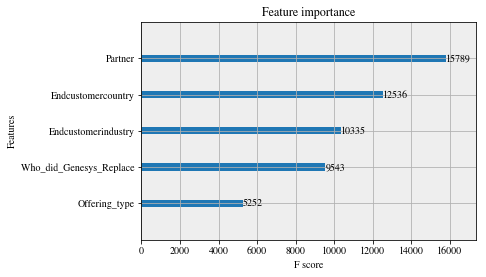

In [24]:
print('\033[1m  With train data \033[0m')
pred = xgb.predict(X_train)
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_train,pred))
print("Classificaiton report")
print(classification_report(y_train,pred))

print("Accuracy report")
print(accuracy_score(y_train,pred))

# plot feature importance
xgboost.plot_importance(xgb)
plt.show()

  With test data 
Confusion Matrix
[[ 0  0  0 ...  0  0  0]
 [ 0  0  4 ...  0  0  1]
 [ 1  2 51 ...  5  0  1]
 ...
 [ 0  1 12 ...  1  0  2]
 [ 0  0  6 ...  1  0  0]
 [ 0  1  7 ...  2  0  1]]
Classificaiton report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         6
           2       0.21      0.75      0.33        68
           3       0.16      0.14      0.15        29
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         7
           9       0.08      0.11      0.10        18
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         3
          13       0.00      0

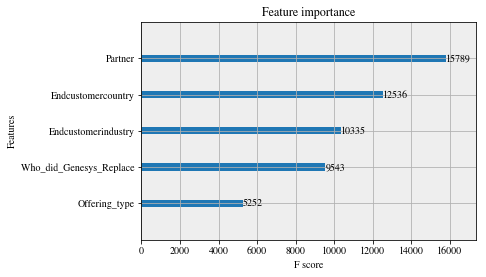

In [25]:
print('\033[1m  With test data \033[0m')
predtestxgb = xgb.predict(X_test)
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test,predtestxgb))
print("Classificaiton report")
print(classification_report(y_test,predtestxgb))

print("Accuracy report")
print(accuracy_score(y_test,predtestxgb))

# plot feature importance
xgboost.plot_importance(xgb)

  With full data 
Confusion Matrix
[[  7   1   2 ...   0   0   0]
 [  0   7  19 ...   0   0   0]
 [  2   3 305 ...   0   0   0]
 ...
 [  0   0   9 ...   1   0   0]
 [  0   0   7 ...   0   0   0]
 [  0   0  10 ...   0   0   0]]
Classificaiton report
              precision    recall  f1-score   support

           0       0.23      0.30      0.26        23
           1       0.37      0.21      0.26        34
           2       0.20      0.73      0.32       415
           3       0.23      0.19      0.20        97
           4       0.27      0.08      0.12       161
           5       0.29      0.12      0.17       135
           6       0.21      0.06      0.10        47
           7       0.40      0.05      0.10        73
           8       0.40      0.17      0.24        23
           9       0.26      0.16      0.20       146
          10       0.20      0.09      0.13        32
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00     

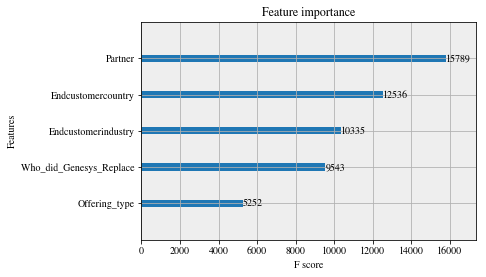

In [26]:
print('\033[1m  With full data \033[0m')
fullpredxgb = xgb.predict(X_full)
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_full,fullpredxgb))
print("Classificaiton report")
print(classification_report(y_full,fullpredxgb))

print("Accuracy report")
print(accuracy_score(y_full,fullpredxgb))

# plot feature importance
xgboost.plot_importance(xgb)

# XGB model for count of smart use case

In [27]:
train['count']=train['Smart_Use_Cases'].apply(lambda x:(x.count('-')+1))


In [28]:
labeldict=[]


leendcustomercountry = LabelEncoder()
train['Endcustomercountry'].replace([np.nan],['NaN_state'], inplace=True)
train['Endcustomercountry'] = leendcustomercountry.fit_transform(train['Endcustomercountry'].astype(object))

leendcustomerindustry = LabelEncoder()
train['Endcustomerindustry'].replace([np.nan],['NaN_state'], inplace=True)
train['Endcustomerindustry'] = leendcustomerindustry.fit_transform(train['Endcustomerindustry'].astype(object))

lepartner = LabelEncoder()
train['Partner'].replace([np.nan],['NaN_state'], inplace=True)
train['Partner'] = lepartner.fit_transform(train['Partner'].astype(object))

leofferingtype = LabelEncoder()
train['Offering_type'].replace([np.nan],['NaN_state'], inplace=True)
train['Offering_type'] = leofferingtype.fit_transform(train['Offering_type'].astype(object))

lereplace = LabelEncoder()
train['Who_did_Genesys_Replace'].replace([np.nan],['NaN_state'], inplace=True)
train['Who_did_Genesys_Replace'] = lereplace.fit_transform(train['Who_did_Genesys_Replace'].astype(object))


labeldict={"Endcustomercountry":leendcustomercountry,
           "Endcustomerindustry":leendcustomerindustry,"Partner":lepartner,"Offering_type":leofferingtype,
           "Who_did_Genesys_Replace":lereplace}


output = open('smart_use_case_xgb_model2.pkl', 'wb')
pickle.dump(labeldict, output)
output.close()

In [29]:
train11 = train.iloc[:500, :]
train21 = train.iloc[500:,:]
X_train1 = train11[['Endcustomercountry','Endcustomerindustry','Partner','Offering_type','Who_did_Genesys_Replace']]
y_train1 = train11[['count']]


X_test1 = train21[['Endcustomercountry','Endcustomerindustry','Partner','Offering_type','Who_did_Genesys_Replace']]
y_test1 = train21[['count']]


X_full1 = train[['Endcustomercountry','Endcustomerindustry','Partner','Offering_type','Who_did_Genesys_Replace']]
y_full1 = train[['count']]


In [30]:
xgb1 = XGBClassifier(max_depth=9,min_child_weight=3,max_delta_step=7,
                    tree_method='exact') #-  increased the true positived but decreased overall score, which is okay!!!

xgb1.fit(X_train1,y_train1)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=7, max_depth=9, min_child_weight=3, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, tree_method='exact', verbosity=1)

  With train data 
Confusion Matrix
[[112   3   1   1   2   1   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  4  71   0   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  3   0  65   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  1   0   1  43   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  4   2   0   1  42   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  2   2   1   0   1  32   1   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  2   1   0   0   2   0  19   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  5   0   0   1   1   0   0  14   0   0   0   0   0   0   0   0   0   0
    0]
 [  4   0   0   1   4   0   0   0   5   1   0   0   0   0   0   0   0   0
    0]
 [  0   1   0   0   0   0   0   0   0  14   0   0   0   0   0   0   0   0
    0]
 [  2   0   0   1   2   0   1   0   0   0   1   1   0   0   0   0   0   0
    0]
 [  0   1   0   0   0   0   1   2   0   0   0   4   0   0   0   0   0   0

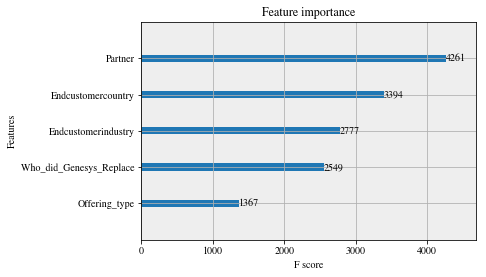

In [31]:
print('\033[1m  With train data \033[0m')
fullpredxgb = xgb1.predict(X_train1)
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_train1,fullpredxgb))
print("Classificaiton report")
print(classification_report(y_train1,fullpredxgb))

print("Accuracy report")
print(accuracy_score(y_train1,fullpredxgb))

# plot feature importance
xgboost.plot_importance(xgb1)

  With test data 
Confusion Matrix
[[ 7  7  7  0  1  0  0  0  0  0  0  0]
 [10  3  6  1  1  0  0  1  0  0  0  0]
 [ 2  3  3  0  0  0  0  1  0  0  0  0]
 [ 7  7  2  0  1  0  0  1  0  0  0  0]
 [ 1  1  5  0  0  0  1  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0]]
Classificaiton report
              precision    recall  f1-score   support

           1       0.25      0.32      0.28        22
           2       0.12      0.14      0.13        22
           3       0.12      0.33      0.18         9
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.

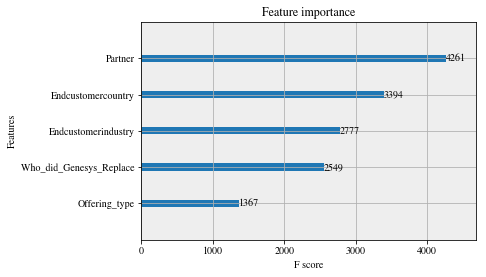

In [32]:
print('\033[1m  With test data \033[0m')
fullpredxgb = xgb1.predict(X_test1)
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test1,fullpredxgb))
print("Classificaiton report")
print(classification_report(y_test1,fullpredxgb))

print("Accuracy report")
print(accuracy_score(y_test1,fullpredxgb))

# plot feature importance
xgboost.plot_importance(xgb1)

  With full data 
Confusion Matrix
[[119  10   8   1   3   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 14  74   6   1   2   0   1   1   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  5   3  68   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  8   7   3  43   1   1   0   1   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  5   3   5   1  42   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  2   3   2   0   1  32   1   1   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  3   1   0   0   2   0  19   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  5   0   0   1   1   0   0  14   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  4   0   0   1   4   0   0   0   5   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   0   0   0   0   0   0   0  14   0   0   0   0   0   0   0   0
    0   0]
 [  2   1   0   1   3   0   1   0   0   0   1   1   0   0   0   0   0   0
    0   0]
 [  0   1   1   0   0   0   1 

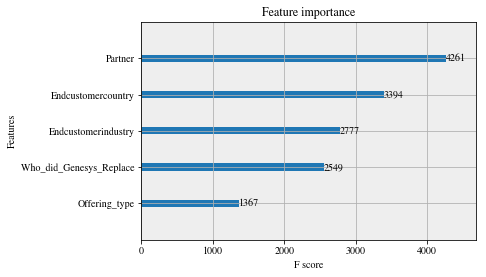

In [33]:
print('\033[1m  With full data \033[0m')
fullpredxgb = xgb1.predict(X_full1)
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_full1,fullpredxgb))
print("Classificaiton report")
print(classification_report(y_full1,fullpredxgb))

print("Accuracy report")
print(accuracy_score(y_full1,fullpredxgb))

# plot feature importance
xgboost.plot_importance(xgb1)

# Predict for two datas

In [34]:
X_full

,Endcustomercountry,Endcustomerindustry,Partner,Offering_type,Who_did_Genesys_Replace
0,10,10,138,3,18
1,10,17,50,3,28
2,49,19,40,3,32
3,49,19,40,3,32
4,49,19,40,3,32
6,65,22,0,0,7
7,65,22,0,0,7
8,65,22,0,0,7
9,65,22,0,0,7
10,65,22,0,0,7


In [35]:
def predict_usecase(length,res):
    #print(res)
    sorted_val=sorted(res,reverse=True)
    #length=3
    # print(sorted_val)
    # print('*****')
    a=[]
    for i in range(0,length):
        a.append(list(res).index(sorted_val[i]))
    print(list(lesmart.inverse_transform(a)))
    return (list(lesmart.inverse_transform(a)))

In [36]:
data = [[10,10,138,3,18]] 
finaldata=pd.DataFrame(data, columns = list(X_test.columns)) 
resultprob=xgb.predict_proba(finaldata)

resultcount=xgb1.predict(finaldata)

print(predict_usecase(resultcount[0],resultprob[0]))
resultcount

['CE01']
['CE01']


array([1], dtype=int64)

In [37]:
data = [[49,19,40,3,32]] 
finaldata=pd.DataFrame(data, columns = list(X_test.columns)) 
resultprob=xgb.predict_proba(finaldata)

resultcount=xgb1.predict(finaldata)

print(predict_usecase(resultcount[0],resultprob[0]))

['EE07', 'CE01', 'EE08']
['EE07', 'CE01', 'EE08']


# Model against full data

In [38]:
def predict_usecase2(length,res):
    #print(res)
    sorted_val=sorted(res,reverse=True)
    #length=3
    # print(sorted_val)
    # print('*****')
    a=[]
    for i in range(0,length):
        a.append(list(res).index(sorted_val[i]))
    #print(list(lesmart.inverse_transform(a)))
    return (list(lesmart.inverse_transform(a)))

fullmatchcount=0
partialMatchCount=0
failCount=0
a=[]
b=[]
for index, row in train.iterrows():
    data = [[row['Endcustomercountry'],row['Endcustomerindustry'],row['Partner'],row['Offering_type'],row['Who_did_Genesys_Replace']]] 
    finaldata=pd.DataFrame(data, columns = list(X_test.columns)) 
    resultprob=xgb.predict_proba(finaldata)
    resultcount=xgb1.predict(finaldata)
    predictedusecase = predict_usecase2(resultcount[0],resultprob[0])
    
    smartusecaselist=row['Smart_Use_Cases'].split('-')
    fullmatch = False
    partialMatch = False
    for case in smartusecaselist:
        match=False
        for case2 in predictedusecase:
            if case.strip() == case2.strip():
                match = True;
        if (match):
            #print("matched"+str(index))
            fullmatch=True
        else:
            partialMatch=True
    for case2 in predictedusecase:
        a.append(case2.strip())
    for case2 in smartusecaselist:
        b.append(case2.strip())
    if (partialMatch):
        partialMatchCount = partialMatchCount +1
        #print("****"+str(smartusecaselist)+" - "+str(predictedusecase))
    elif (fullmatch):
        fullmatchcount = fullmatchcount +1
        #print(predictedusecase)
    else:
        failCount = failCount+1
    #if index == 3:
        #break
        
print("Failed "+str(failCount)+" partial match: "+str(partialMatchCount)+ " Ful match: "+str(fullmatchcount))

Failed 0 partial match: 225 Ful match: 363


In [39]:
train.shape

(588, 79)

In [40]:
363/588

0.6173469387755102

In [41]:
225/588

0.3826530612244898